<a href="https://colab.research.google.com/github/Michalinh0/DS2022/blob/main/waveenergyconverters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor

<class 'pandas.core.frame.DataFrame'>


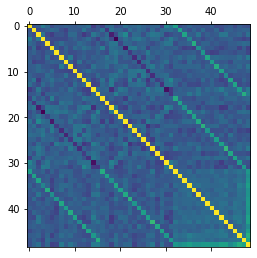

In [119]:
data_adelaide = pd.read_csv("Adelaide_Data.csv")
data_sydney = pd.read_csv("Sydney_Data.csv")
data_perth = pd.read_csv("Perth_Data.csv")
data_tasmania = pd.read_csv("Tasmania_Data.csv")

strOfNames = []

for i in range (16):
  strOfNames.append("X" + str(i+1))
for i in range (16):
  strOfNames.append("Y" + str(i+1))
for i in range (16):
  strOfNames.append("P" + str(i+1))
strOfNames.append("Total")

data_adelaide.columns = strOfNames

ycolumns = data_adelaide.iloc[:,16:48]

corr = data_adelaide.corr()
print(type(corr))

plt.matshow(corr)

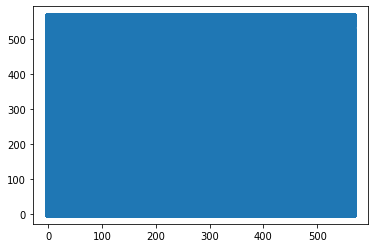

In [120]:
plt.scatter(data_adelaide.iloc[:,0] , data_adelaide.iloc[:,16])

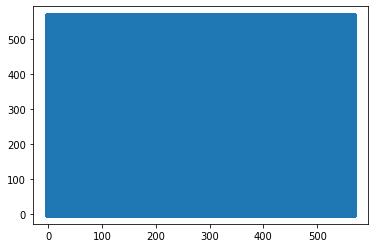

In [121]:
plt.scatter(data_adelaide.iloc[:,1] , data_adelaide.iloc[:,17])

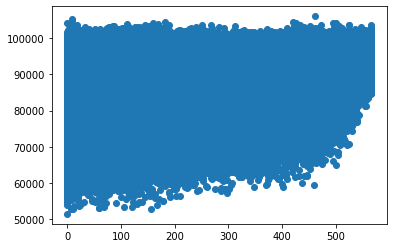

In [122]:
plt.scatter(data_adelaide.iloc[:,0] , data_adelaide.iloc[:,32])

In [123]:
lista = []

for i in range(16):
  arg1, arg2 = "X" + str(i+1) , "Y" + str(i+1)
  lista.append(arg1)
  lista.append(arg2)


print(lista)

['X1', 'Y1', 'X2', 'Y2', 'X3', 'Y3', 'X4', 'Y4', 'X5', 'Y5', 'X6', 'Y6', 'X7', 'Y7', 'X8', 'Y8', 'X9', 'Y9', 'X10', 'Y10', 'X11', 'Y11', 'X12', 'Y12', 'X13', 'Y13', 'X14', 'Y14', 'X15', 'Y15', 'X16', 'Y16']


In [124]:
x = data_adelaide[lista].values.reshape(-1, 1)[:1000]
y = data_adelaide["Total"].values.reshape(-1, 1)[:1000]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [125]:
# f = plt.figure()
# f.set_figwidth(30)
# f.set_figheight(15)
# plt.xlabel("X")
# plt.ylabel("Y")
# plt.plot(x, (x * model.coef_ + model.intercept_),"r")
# plt.scatter(x,y)
# print('Mean squared error equals:',mean_squared_error(y, (x*model.coef_+model.intercept_)))
# print(model.coef_)
# print(model.intercept_)

y_pred = model.predict(X_test)

print("\nŚredni procent błędu:")
print(str((np.sqrt(mean_squared_error(y_test, y_pred))/np.mean(y))*100)+" %")
print(np.sqrt(mean_squared_error(y_test, y_pred)))


Średni procent błędu:
2.2340455233906775 %
30610.6272745921


In [126]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 1, alpha = 100, n_estimators = 100)

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print(rmse)

# print(str((rmse/np.mean(y))*100)+" %")
# print("RMSE: %f" % (rmse))

30666.32814169541


In [138]:
regr = MLPRegressor(random_state = 1, max_iter = 500).fit(X_train,y_train)
y_pred=regr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1121069.1789225896


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [128]:
# model = lgb.LGBMRegressor(learning_rate=0.09,max_depth=-5,random_state=42)
# model.fit(X_train,y_train)

# print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
# print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

In [129]:
data_test = pd.read_csv("Adelaide_Data.csv")
data_test.columns = strOfNames

print(f"Rows before deletion: {len(data_test)}")
lista.append("Total")
data_test = data_test[lista]

# print(data_test)

data_test.replace(0, np.nan, inplace=True)
data_test.dropna(0, inplace=True)
print(f"Rows after deletion: {len(data_test)}")

lista.pop()

Rows before deletion: 71998
Rows after deletion: 24250


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  # This is added back by InteractiveShellApp.init_path()


'Total'

In [130]:
x = data_test[lista].values.reshape(-1, 1)[:1000]
y = data_test["Total"].values.reshape(-1, 1)[:1000]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nŚredni procent błędu:")
print(str((np.sqrt(mean_squared_error(y_test, y_pred))/np.mean(y))*100)+" %")
print(np.sqrt(mean_squared_error(y_test, y_pred)))


Średni procent błędu:
2.6966396277180293 %
36815.27285787309
